# Gym (Machine Learning)

I. General Information. Interim conclusions.

II. Data preprocessing. Interim conclusions.

- Columns heading editing.
- Changing the data type.
    

III. Exploratory Data Analysis (EDA)

- Analysis of the averages.
- Features distribution.
- Correlation matrix. Multicollinearity.
- Interim conclusions.       
    
    
IV. Model for clients churn forecasting.

- Test and train split.
- Models (logistic regression, random forest).
- Metrics estimation.
- Interim conclusions. 


V. Clusterization.

- Data standardization.
- Agglomerative hierarchical clustering (AHC).
- K-Means algorithm .
- Average values and features distributions for each cluster. Churn rate.
- Interim conclusions.
    

VI. General conclusion and recommendations.

In [1]:
# libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
# pandas customization
pd.set_option('precision', 2)
pd.set_option('display.float_format', '{:,.4f}'.format)

In [4]:
# reading the files and saving it to the variables
pth1 = '/home/yuso/jupyter_dir/jupyter_env/datasets/gym_churn.csv'
pth2 = '/datasets/gym_churn.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [5]:
# custom function for primary data analysis 
def get_info(df):
    percentiles= [.20, .40, .60, .80]
    include=['object', 'float', 'int']
    print(f'\033[0;37;40m Total number of rows: \033[0;0m {df.shape[0]} rows\n \n\033[0;37;40m Total number of columns: \033[0;0m {df.shape[1]} columns\n')
    print('\033[4;37;40m GENERAL INFORMATION \033[0;0m')
    print(df.info(memory_usage='deep'))
    print('\n\033[0;37;40m Top 5 rows: \033[0;0m')
    display(df.head())
    print('\n\033[0;37;40m Last 5 rows: \033[0;0m')
    display(df.tail())
    print('\n\033[0;37;40m Missing values ratio: \033[0;0m')
    print(round(df.isnull().mean() * 100, 2))
    print('\n\033[2;37;40m Duplicates ratio \033[0;0m', '  ', round(df.duplicated().mean() * 100, 2), ' %')
    print('\n\033[0;37;40m Numerical and categorical data summary: \033[0;0m')
    display(pd.DataFrame(df.describe(percentiles = percentiles, include = include).T))

In [6]:
# primary data analysis 
get_info(data)

 Total number of rows:  4000 rows
 
 Total number of columns:  14 columns

 GENERAL INFORMATION 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime               

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.2275,5.0000,3,0.0204,0.0000,0
1,0,1,0,0,1,12,1,31,113.2029,12.0000,7,1.9229,1.9102,0
2,0,1,1,0,1,1,0,28,129.4485,1.0000,2,1.8591,1.7365,0
3,0,1,1,1,1,12,1,33,62.6699,12.0000,2,3.2056,3.3572,0
4,1,1,1,1,1,1,0,26,198.3623,1.0000,3,1.1139,1.1201,0



 Last 5 rows: 


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.4060,12.0000,8,2.2845,2.3491,0
3996,0,1,0,0,1,1,1,29,68.8838,1.0000,1,1.2772,0.2929,1
3997,1,1,1,1,1,12,0,28,78.2505,11.0000,2,2.7861,2.8314,0
3998,0,1,1,1,1,6,0,32,61.9127,5.0000,3,1.6301,1.5962,0
3999,1,0,1,0,0,12,1,30,178.8618,12.0000,1,1.1018,1.0353,0



 Missing values ratio: 
gender                              0.0000
Near_Location                       0.0000
Partner                             0.0000
Promo_friends                       0.0000
Phone                               0.0000
Contract_period                     0.0000
Group_visits                        0.0000
Age                                 0.0000
Avg_additional_charges_total        0.0000
Month_to_end_contract               0.0000
Lifetime                            0.0000
Avg_class_frequency_total           0.0000
Avg_class_frequency_current_month   0.0000
Churn                               0.0000
dtype: float64

 Duplicates ratio     0.0  %

 Numerical and categorical data summary: 


,count,mean,std,min,20%,40%,50%,60%,80%,max
gender,"4,000.0000",0.5102,0.5000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000
Near_Location,"4,000.0000",0.8452,0.3617,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Partner,"4,000.0000",0.4868,0.4999,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000
Promo_friends,"4,000.0000",0.3085,0.4619,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000
Phone,"4,000.0000",0.9035,0.2953,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Contract_period,"4,000.0000",4.6813,4.5497,1.0000,1.0000,1.0000,1.0000,6.0000,12.0000,12.0000
Group_visits,"4,000.0000",0.4123,0.4923,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,1.0000
Age,"4,000.0000",29.1842,3.2584,18.0000,26.0000,28.0000,29.0000,30.0000,32.0000,41.0000
Avg_additional_charges_total,"4,000.0000",146.9437,96.3556,0.1482,55.7969,109.3333,136.2202,163.1525,229.1640,552.5907
Month_to_end_contract,"4,000.0000",4.3228,4.1913,1.0000,1.0000,1.0000,1.0000,5.0000,9.0000,12.0000


**According to the documentation:**

- ` Churn ` — the fact of churn for the month in question;           

*User data for the preceding month:*
           
- `gender`
- `Near Location` — whether the user lives or works in the neighborhood where the gym is located;
- `Partner` — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers’ employers);
- `Promo friends` — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership);
- `Phone` — whether the user provided their phone number;
- `age`
- `Lifetime` — the time (in months) since the customer first came to the gym;         

*Data from the log of visits and purchases and data on current membership status:*
          
- `Contract period` —1 month, 3 months, 6 months, or 1 year;
- `Month to end contract` — the months remaining until the contract expires;
- `Group visits` — whether the user takes part in group sessions;
- `Avg class frequency total` — average frequency of visits per week over the customer's lifetime;
- `Avg class frequency current _month` — average frequency of visits per week over the preceding month;
- `Avg additional charges total` — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.


**Brief data anlysis:**

- no missing values or duplicates in the data;
- column headings issues: uppercase and lowercase letters;
- data type issues - column `Month_to_end_contract` - is better to store as a whole number.

## Interim conclusions

According to the data, we have 4000 user profiles, about 27% of them are marked as churn. Other features (the average values):

- `gender` column 51% - approximately equal number of men and women;
- `Near_Location` - 85% of clients live or work in the area where the gym is located;
- `Partner` - 49% of clients are employees of the partner company (and get discounts);
- `Promo_friends` - 31% of clients signed up through a "bring a friend" offer;
- `Phone` - 90% of profiles with a phone number;
- `Age` - the range is between 18 and 41 y.o, average is 29 y.o.;
- `Lifetime` - clients go to the gym on average almost 4 months;
- `Contract_period` - the average time since the first visit is approximately 4.5 months;
- `Month_to_end_contract` - 50% of clients have one month to complete their current valid subscription (the average of 4 months is not quite correct due to the high STD (4 months);
- `Group_visits` - 41% of clients take group classes;
- `Avg_class_frequency_total` - the average weekly visit rate is 1.88 times;
- `Avg_class_frequency_current_month` - average frequency of visits per week for the previous month (before churn) is 1.77 times;
- `Avg_additional_charges_total` - total revenue from other services is in a wide range - from 0.15 to 552 USD with an average of 146 USD.
 

It can be argued that currently available data is sufficient for the task. But this data needs to be processed: we need to change the data type and column headings.

# Data preprocessing

## Columns heading processing

In [7]:
# # transform to lowercase
data.columns = data.columns.str.lower()
data.head(1)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.2275,5.0000,3,0.0204,0.0000,0


## Changing the data type

In [8]:
# transform to int
data['month_to_end_contract'] = data['month_to_end_contract'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   int64  
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

## Interim conclusions
In this section we've:

- changed the data type (to int64);
- edited some of the column headings according to the naming conventions in Python;

# Exploratory Data Analysis (EDA)

In this section, we will perform the following tasks:

- analysis of the mean feature values in two groups - for those who left (churn) and those who stayed (we'll use groupby());
- plot bar histograms and feature distributions for those who left (churn) and those who stayed;
- build and display a correlation matrix.

## Mean feature values analysis

In [9]:
# mean values by client group
data_grouped = data.groupby('churn').agg('mean').reset_index()
data_grouped

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.5100,0.8731,0.5342,0.3535,0.9037,5.7472,0.4641,29.9765,158.4457,5.2831,4.7118,2.0249,2.0279
1,1,0.5108,0.7681,0.3553,0.1838,0.9029,1.7286,0.2686,26.9896,115.0829,1.6626,0.9906,1.4750,1.0445


*Conclusions:* 

- `gender` - equal distribution of men and women in two categories;
- `near_location` - high ratio of users living in the gym area, but for active users - 10% more;
- `partner` - users from churm are less likely to be employees of partner companies (35% compared to 53%);
- `promo_friends` - users from churn rarely  signed up through a "bring a friend" offer (18% against 35%);
- `phone` - the ratio of profiles with a completed phone number is the same in both groups;
- `age` - has similar distribution in both groups;
- `lifetime` - for loyal customers the parameter is 4.7 months, for users from churn - 1 month;
- `contract_period` - the average time since the first visit is approximately 6 months (5.7) for loyal customers and approximately 2 months (1.72) for churn;
- `month_to_end_contract` - 5.2 months for loyal customers and 1.6 months for customers from churn;
- `group_visits` - loyal customers visit the gym much more often (46% versus 26%);
- `avg_class_frequency_total` - average frequency of visits per week is 2 times for active clients  and almost 1.5 times for churn;
- `avg_class_frequency_current_month` - average frequency of visits per week for the previous month is 2 times for active clients and 1 time for churn;
- `avg_additional_charges_total` - total revenue from other services is higher for active clients (158 USD versus 115 USD).

## Feature distributions

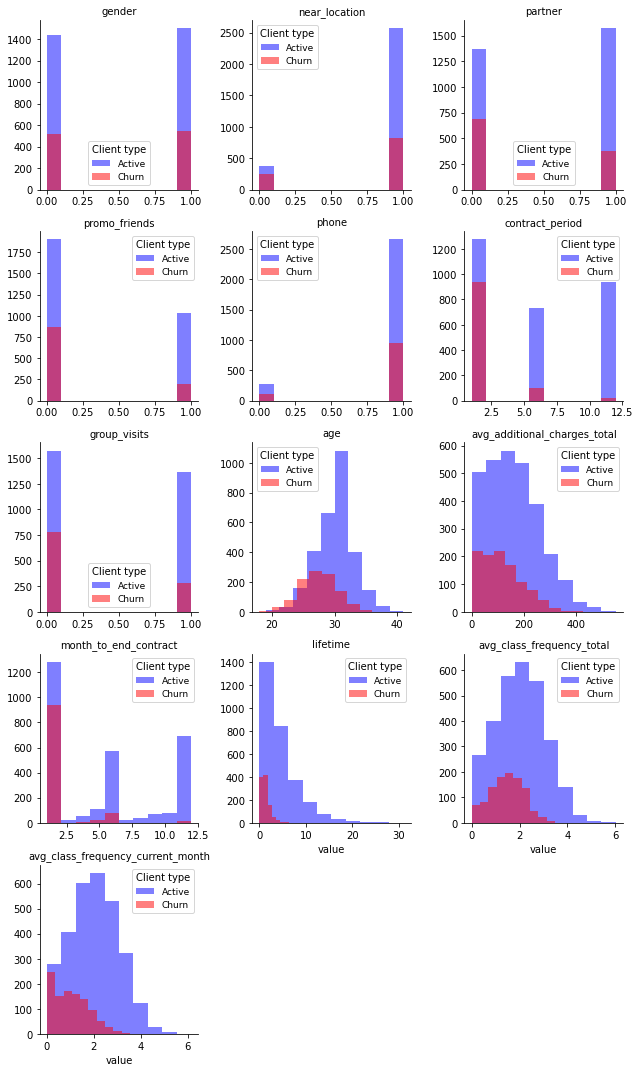

In [10]:
# column bar charts and feature distributions
g = sns.FacetGrid(data=data.melt(id_vars='churn'),
                  col='variable',hue='churn', sharex=False,sharey=False,
                  col_wrap=3, palette=['blue','red'])
g = g.map(plt.hist, 'value', alpha=0.5)
g.set_titles(col_template='{col_name}')
for ax in g.axes.ravel():
    ax.legend(title='Client type', labels=['Active', 'Churn'], prop={'size':9})

*Conclusions:* 

- `gender` - the same distribution of men and women;
- `near_location` - the high ratio of users living in the area of the gym, for active users this ratio is greater;
- `partner` - users from churn are less often employees of partner companies;
- `promo_friends` - the ratio of clients who signed up through a "bring a friend" offer is higher;
- `phone` - the ration of profiles with a phone number is approximately the same;
- `age` - the distribution is normal, the histogram of churn is slightly shifted to the left, towards younger age;
- `lifetime` - exponential distribution, histogram of loyal clients shifted more to the right;
- `contract_period` - the average time since the first visit for churn clients  is significantly lower (1 month);
- `month_to_end_contract` - usually subscription is purchased for one month (especially for churn), for 6 and 12 months are mostly purchased by loyal clients;
- `group_visits` - loyal clients take group classes more often, for those who do not take - the same ratio of two groups (loyal and churn);
- `avg_class_frequency_total` - distribution is normal;
- `avg_class_frequency_current_month` - distribution for loyal customers is normal, for churn is closer to the exponential, peak around 0;
- `avg_additional_charges_total` - distribution is exponential, the histogram of loyal clients is shifted to the right;

## Correlation matrix. Multicollinearity.

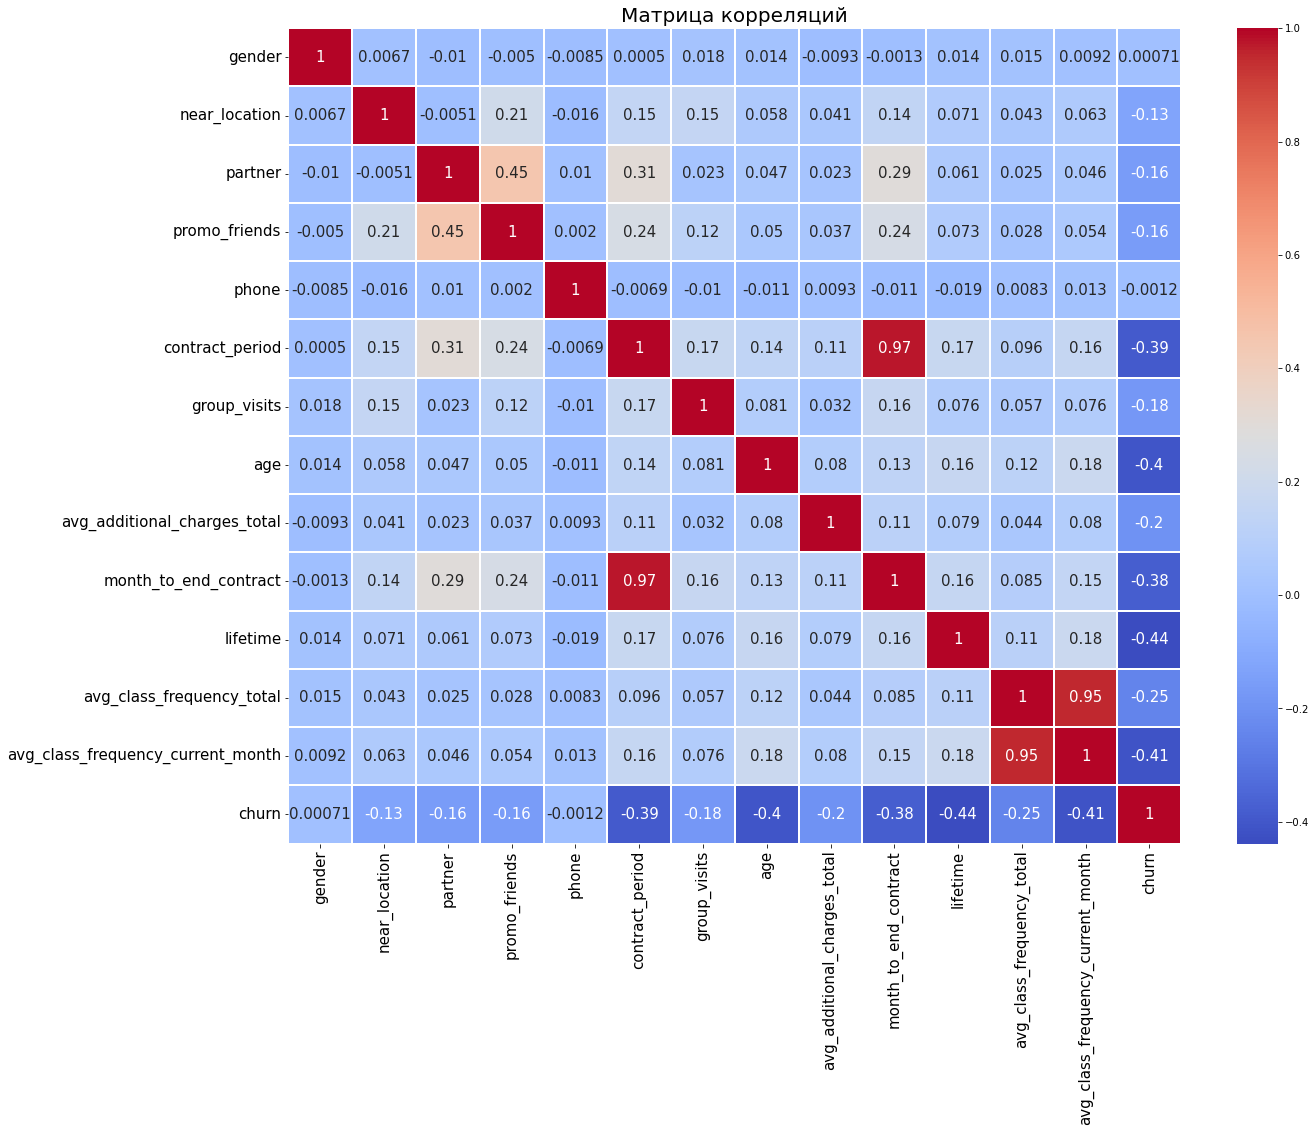

In [11]:
# correlation matrix
corr_matrix = data.corr()
corr_matrix

# matrix visualization (heatmap)
plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=2, 
            annot_kws={'fontsize':15})
plt.title('Матрица корреляций', fontsize = 20)
plt.xticks(rotation = 'vertical', fontsize = 15)
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.show()

*Conclusions:*

High correlative features:

- ː `month_to_end_contract` and `contract_period` (coefficient is 0.97)
- `avg_class_frequency_total` and `avg_class_frequency_current_month` (0.95).  

Multicollinearity may cause the model to be retractable, leading to the wrong result. In addition, excessive coefficients increase the complexity of the machine learning model, which means that its training time increases.     

Let's remove one of a pair of multicollinear features.

Also note that there is a small negative correlation (from -0.3 to -0.5) between the target feature (churn) and the following:
- `contract_period`;
- `month_to_end_contract`;
- `age`;
- `lifetime`;
- `avg_class_frequency_current_month`;

In [12]:
# remove one of a pair of multicollinear features
data.drop(['month_to_end_contract', 'avg_class_frequency_total'], 
          axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   lifetime                           4000 non-null   int64  
 10  avg_class_frequency_current_month  4000 non-null   float64
 11  churn                              4000 non-null   int64

## Interim conclusions

In this section, we evaluated the mean feature values, as well as their distribution (divided into two categories of clients- loyal and churn): some features have similar distribution for both groups - age, sex, phone number, others differ - the average time since the first visit and subscription, taking group classes, additional expenses.

When analyzing the correlation matrix and the heatmap, we identified multicollinear features and removed one of each pair. Found a negative weak correlation between some features and the target variable.

# Model for clients churn forecasting

In this section we will:
- divide data into test and train samples;
- standardize data;
- create alogistic regression model and a random forest model;
- estimate metrics (accuracy, precision, recall, f1-score);
- analyze the importance of the features;

Then, due to unbalanced classes (27% of churn clients), we will calculate the metrics by setting a custom threshold and re-estimate them.

## Train and test split

We don’t predict the time series, so we divide the data randomly.

In [13]:
# train test split
X = data.drop('churn', axis=1)
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=666, stratify=y)

In [14]:
# standartization
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

## Models

In [15]:
# creating models
lr_model = LogisticRegression(random_state=123)
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)

# train 
lr_model.fit(X_train_st, y_train)
rf_model.fit(X_train_st, y_train);

# predictions
lr_predictions = lr_model.predict(X_test_st)
rf_predictions = rf_model.predict(X_test_st)

# probabilities
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

## Metrics estimation

In [16]:
# regression metrics
report_lr = classification_report(y_test, lr_model.predict(X_test_st), 
                                  target_names=['Non-churned', 'Churned'])
print(report_lr)

              precision    recall  f1-score   support

 Non-churned       0.93      0.95      0.94       588
     Churned       0.84      0.80      0.82       212

    accuracy                           0.91       800
   macro avg       0.89      0.87      0.88       800
weighted avg       0.91      0.91      0.91       800



In [17]:
# roc-auc calculation
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, lr_predictions)))

ROC-AUC: 0.87


In [18]:
# random forest metrics
report_rf = classification_report(y_test, rf_model.predict(X_test_st), 
                                  target_names=['Non-churned', 'Churned'])
print(report_rf)

              precision    recall  f1-score   support

 Non-churned       0.93      0.95      0.94       588
     Churned       0.84      0.79      0.81       212

    accuracy                           0.91       800
   macro avg       0.88      0.87      0.88       800
weighted avg       0.90      0.91      0.90       800



In [19]:
# roc-auc
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, rf_predictions)))

ROC-AUC: 0.87


In [20]:
# set threshold
threshold = 0.4

We lowered the threshold, i.e. the model will classify the observation to churn with a confidence of 0.4 or more.

In [21]:
# predictions with threshold
lr_custom_predictions = [0 if i < threshold else 1 for i in lr_probabilities]
rf_custom_predictions = [0 if i < threshold else 1 for i in rf_probabilities]

In [22]:
# regression metrics with threshold
report_lr_custom = classification_report(y_test, lr_custom_predictions, 
                                  target_names=['Non-churned', 'Churned'])
print(report_lr_custom)

              precision    recall  f1-score   support

 Non-churned       0.95      0.93      0.94       588
     Churned       0.82      0.87      0.84       212

    accuracy                           0.92       800
   macro avg       0.89      0.90      0.89       800
weighted avg       0.92      0.92      0.92       800



In [23]:
# rf metrics with threshold
report_rf_custom = classification_report(y_test, rf_custom_predictions, 
                                  target_names=['Non-churned', 'Churned'])
print(report_rf_custom)

              precision    recall  f1-score   support

 Non-churned       0.95      0.92      0.93       588
     Churned       0.80      0.86      0.83       212

    accuracy                           0.91       800
   macro avg       0.87      0.89      0.88       800
weighted avg       0.91      0.91      0.91       800



*Conclusions: accuracy - is useless in problems with unequality between classes, and in our data the ratio is 27% (churn) vs 73% (loyal). Recall demonstrates the ability of the algorithm to detect the target class (churn) in general, and precision demonstrates the ability to distinguish this class from others. Obviously, we can’t find all the churn clients and only them. Therefore we combine precision and recall into an aggregated quality criterion - F1-score, harmonic mean of precision and recall.*

**Logistic regression with a custom threshold showed the best result in this metric (F1 score) - (0.83 against 0.79).**

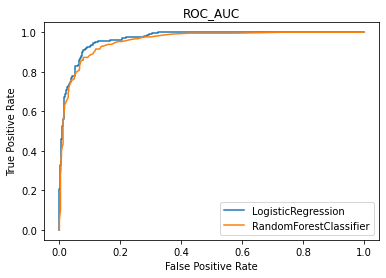

In [24]:
# roc_auc visualization
fpr, tpr, thresh = roc_curve(y_test, lr_probabilities)
plt.plot(fpr,tpr,label='LogisticRegression')
fpr, tpr, thresh = roc_curve(y_test, rf_probabilities)
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC')
plt.legend(loc=0)
plt.show()

*Conclusion: the regression model curve is closer to the upper left corner, i.e. is better than RF.*

## Features importance

In this section, we will analyze what features each of the models considered to be the most important.

In [25]:
# features importance for rf model
df_rf = pd.DataFrame({'feature': X.columns, 'coeff': rf_model.feature_importances_})
display(df_rf.sort_values(by='coeff', ascending=False))

,feature,coeff
9,lifetime,0.3022
10,avg_class_frequency_current_month,0.2163
7,age,0.1558
8,avg_additional_charges_total,0.1241
5,contract_period,0.1121
6,group_visits,0.0205
0,gender,0.0164
2,partner,0.0156
3,promo_friends,0.0149
1,near_location,0.0137


In [26]:
# features importance for regression model
df_lr = pd.DataFrame({'feature': X.columns, 'coeff': lr_model.coef_[0]})
display(df_lr.sort_values(by='coeff'))

,feature,coeff
9,lifetime,-3.5498
5,contract_period,-1.4747
10,avg_class_frequency_current_month,-1.2916
7,age,-1.1737
8,avg_additional_charges_total,-0.5963
6,group_visits,-0.3756
3,promo_friends,-0.2035
1,near_location,-0.0751
4,phone,-0.0663
2,partner,-0.0297


*Conclusions: in general, features importance for both models is similar: lifetime, the frequency of visits to the gym, subscription, and the amount of extra expenses. Note the relatively high position of age (in the top 5) for both models, which was not evident in the initial analysis of the data.*

## Interim conclusions

*Threshold = 0.5*

The random forest model is slightly worse than the regression in precision (0.80 vs. 0.81). This metric reflects the ratio of correct answers only among the target class - churn.
The ratio of correct answers (accuracy) for both metrics is 0.89.
Recall is higher for the logistic regression model (0.76 vs. 0.73). This metric shows how many real objects of the 'churn' class we could find using the model.
F1-score takes into account the balance between the previous two and it ish igher for the regression model (0.79 vs. 0.76).

*Overall, the metrics of the logistic regression model are better.*

*Threshold = 0.4*

For the regression model following metrics became better: accuarcy (0.89 -> 0.91), recall (0.76 -> 0.86), f1_score (0.79 -> 0.83), and reduced precision (0.81 -> 0.80).     
For the random forest model, precision decreased (0.80 -> 0.76) but increased recall (0.73 -> 0.81).

*According to the ROC-AUC visualization, the logistic regression model is better.*

The logistic regression with the custom threshold showed the best result in the target metric - F1- score - (0.83 versus 0.79 for random forest).

When evaluating the importance of the features, results for both models were similar. The most important features are: lifetime, the frequency of visits to the gym, subscription, and the amount of extra expenses. Note the relatively high position of age (in the top 5) for both models, which was not evident in the initial analysis of the data.

# Clusterization

This section consists of the following parts:

- standardization;
- distance matrix calculation (`linkage` function) and plotting a dendrogram;
- creating and training the clustering model based on the K-Means algorithm;
- analysis of mean values and feature distributions for clusters;
- calculation of the churn ratio for each cluster (`groupby` method);

In [27]:
# standardization
sc = StandardScaler()
X_sc = sc.fit_transform(X)

## Agglomerative hierarchical clustering (AHC).

At this stage, we will calculate a distance matrix array, with a pairwise distance between two features, and visualize it with a dendrogram.

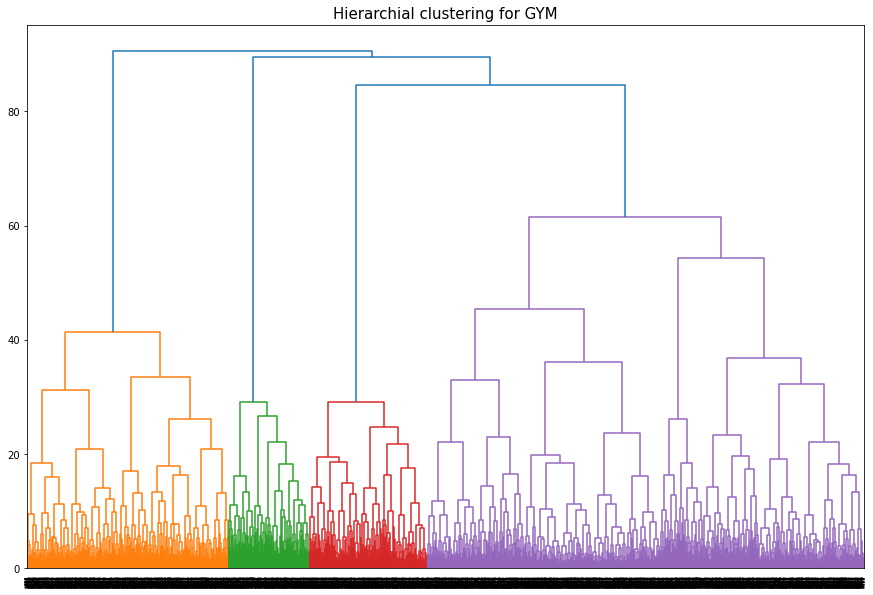

In [28]:
# distance matrix
linked = linkage(X_sc, method = 'ward') 

# dendrogram visualization
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM', fontsize=15)
plt.show() 

*Conclusions: the optimal number of clusters proposed for us is 4 - we see four different colors on the chart. The fourth segment is rather bulky, so for the clustering algorithm we will set the number of clusters to five.*

## K-Means algorithm

In [29]:
# create and train model
km = KMeans(n_clusters=5, random_state=123)
labels = km.fit_predict(X_sc)

In [30]:
# model estimation
silhouette_score(X_sc, labels)

0.14033571168178652

*Conclusion: silhouette score takes values from -1 to 1. Closer to one, it's better. The quality of our clustering is not that high.*

## Cluster analysis

In [31]:
# save cluster labels in a separate column
data['cluster_km'] = labels

In [32]:
# mean feature values for clusters
cluster_features = data.groupby('cluster_km').mean().reset_index()
numeric_columns = cluster_features.drop(columns=['cluster_km']).columns
cluster_features.style.format({i: '{:.2f}' for i in numeric_columns}) \
    .highlight_max(color='yellowgreen', subset=numeric_columns) \
    .highlight_min(color='coral', subset=numeric_columns)
cluster_features.T.style.background_gradient(cmap='coolwarm', axis=1).set_precision(2)

,0,1,2,3,4
cluster_km,0.00,1.00,2.00,3.00,4.00
gender,0.53,0.50,0.50,0.52,0.51
near_location,1.00,0.00,1.00,0.86,1.00
partner,0.39,0.49,0.89,0.47,0.21
promo_friends,0.01,0.08,1.00,0.31,0.07
phone,1.00,1.00,1.00,0.00,1.00
contract_period,6.38,2.99,6.91,4.78,1.99
group_visits,0.53,0.23,0.52,0.43,0.30
age,30.71,28.68,29.60,29.30,27.68
avg_additional_charges_total,176.82,137.13,153.32,144.21,120.63


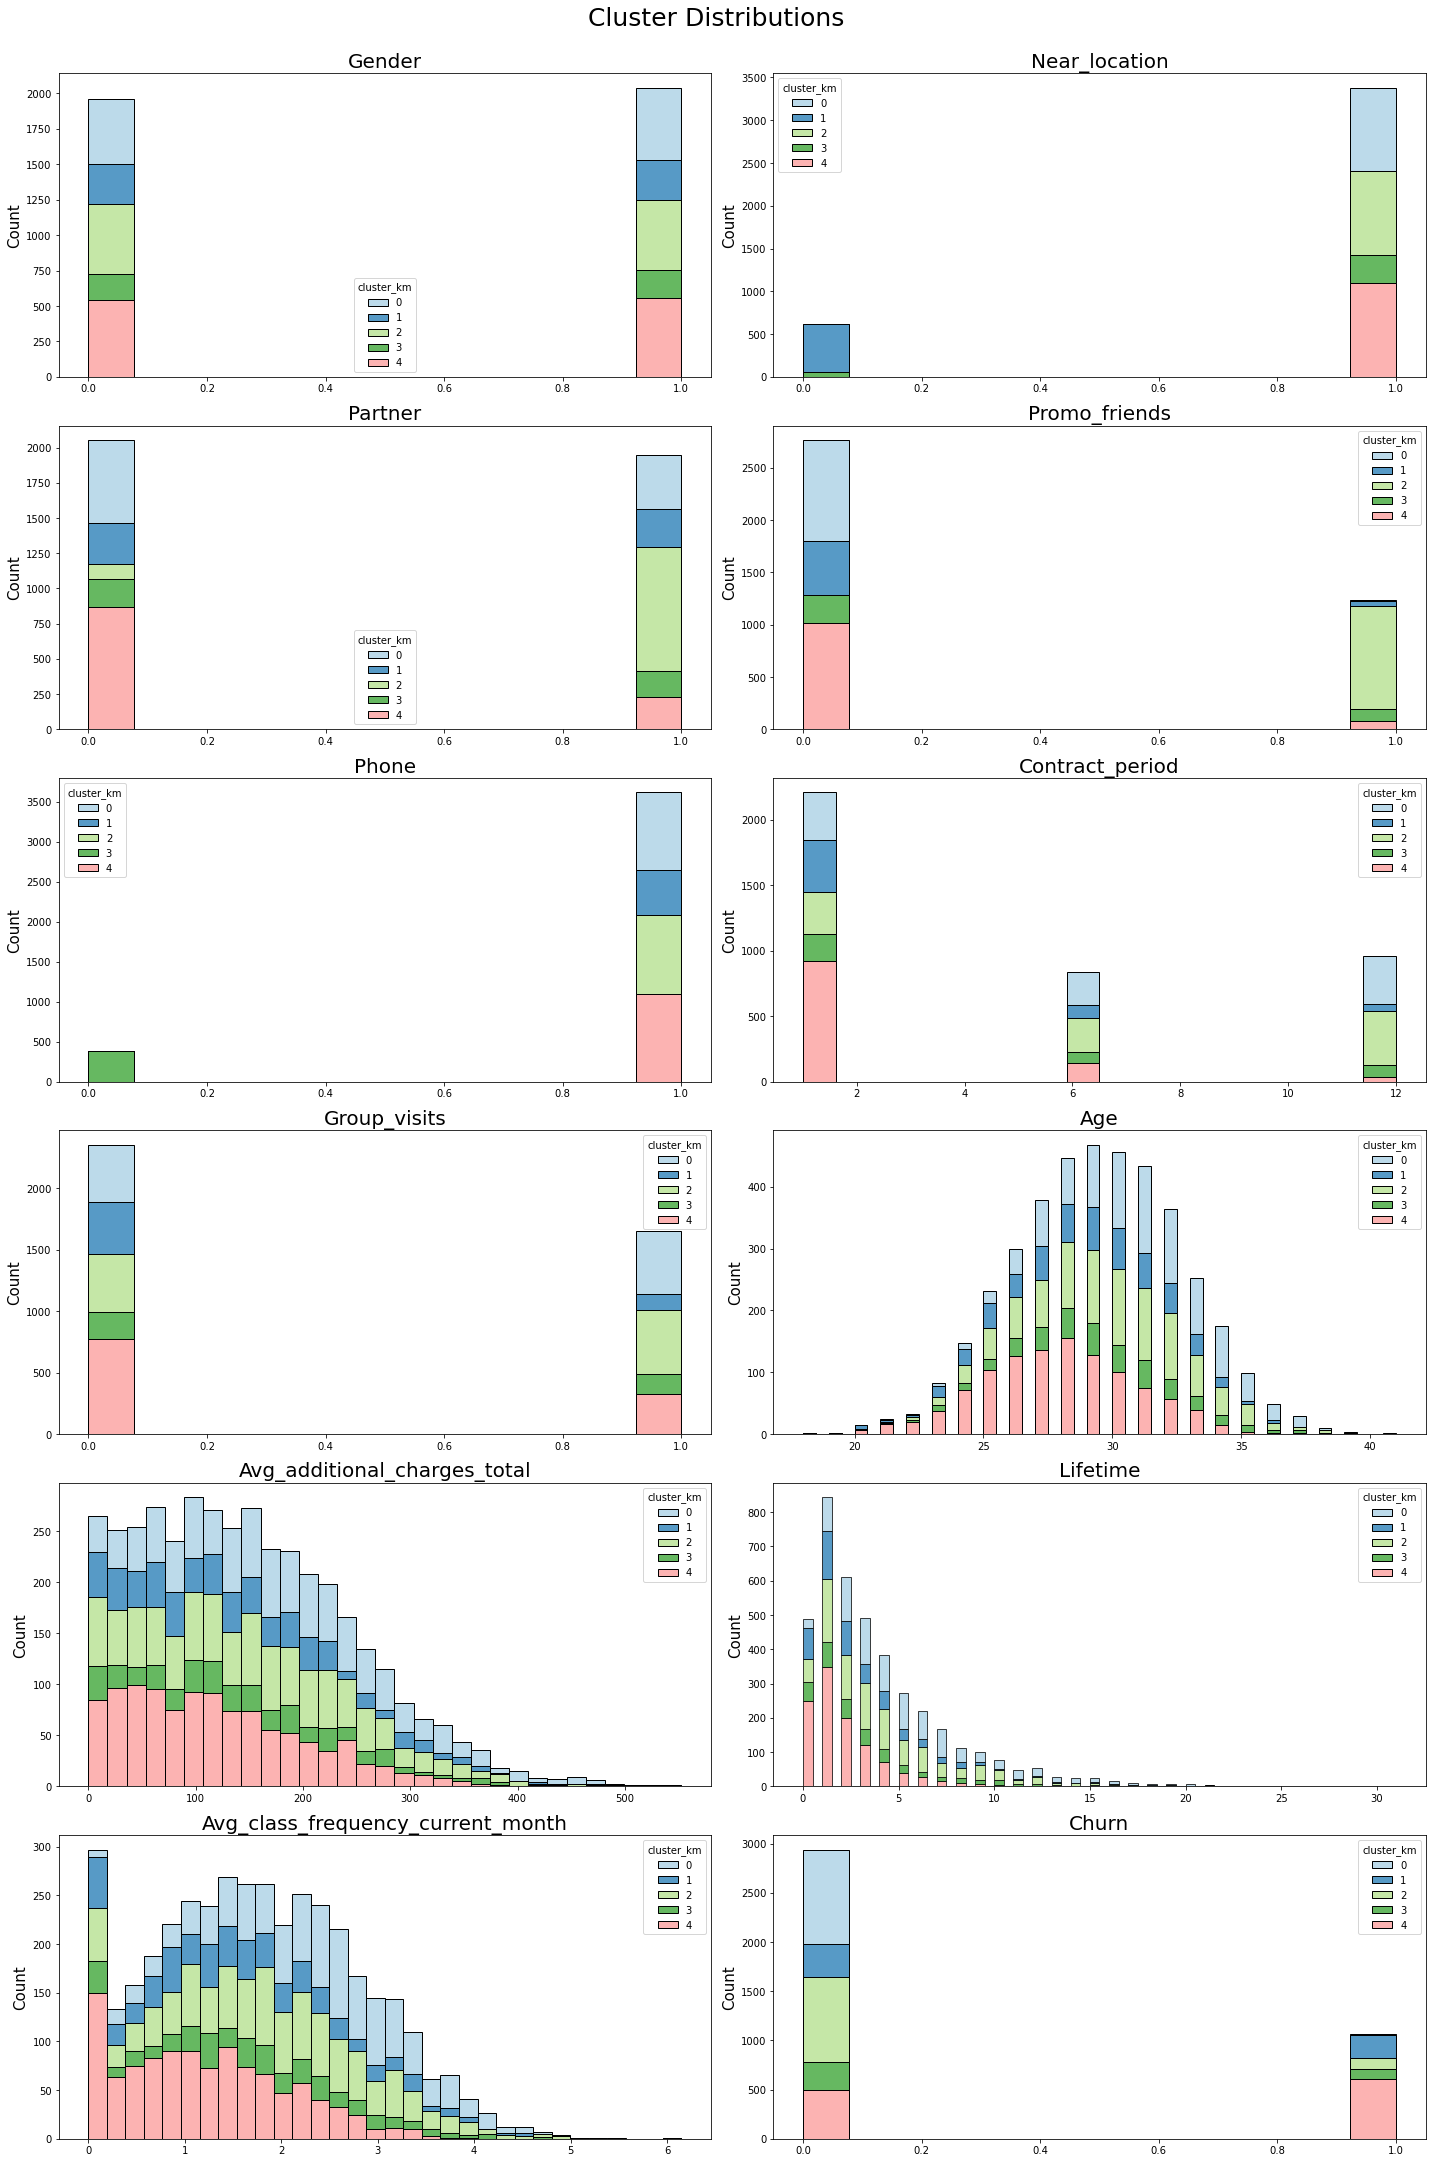

In [33]:
# features distribution for each cluster
fig, axs = plt.subplots(nrows=6, ncols=2, figsize=(20, 30))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Cluster Distributions', fontsize=25, y=1)
for column, ax in zip(data.drop('cluster_km', axis=1).columns, axs.ravel()):
    sns.histplot(data, x=column, hue='cluster_km', palette='Paired', 
                 multiple='stack', ax=ax)
    ax.set_title(column.capitalize(), fontsize=20)
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=15)
plt.tight_layout()
plt.show()

In [34]:
# churn ratio calculation
display(data.groupby('cluster_km').agg('mean')['churn'].to_frame())

,churn
cluster_km,
0,0.0113
1,0.4032
2,0.1207
3,0.2668
4,0.5502


*Conclusions:*

- 0 and 2nd clusters represent mainly loyal clients (churn rate is 1.13% and 12.07% respectively);
- churn clients are concentrated mainly in 1st and 4th clusters (40.32% and 55.02% respectively);
- churn ratio in 3rd cluster is 26.68%;
- sex, location, contact number and age do not affect the churn (the average age of churn is 2 years younger that of loyal);
- partner company feature and the "bring a friend" offer vary between clusters, but have no clear conncetion with churn;

*Churn:*
- visit the gym for 2-3 months and purchase supscription for the same period of time;
- visit the gym up to 2 times a week 
- take less frequently group classes;
- spend less money accordingly on other services in the gym;


*Loyal:*
- visit the gym from 4 to 5.5 months and purchase supscription for six months or more;
- visit the gym more often (from 2 times a week or more), 
- take group classes;
- spend more money on other services in the gym;

## Detailed information

*Cluster 0 - loyal employees of partner companies, who live nearby:*

- roughly the same number of male and female clients;
- all clients from this cluster work/live nearby;
- 39% are employees of partner companies;
- 1% signed up through a "bring a friend" offer;
- all have contact details;
- clients are distributed evenly into three groups of subscriptions (the largest subset purchased a one year subscription);
- 50% take group classes;
- average age is 30 y.o.;
- they spend approximately 176 USD on additional services;
- their average lifetime is 5.5 months;
- number of visits - 2.3 times a week;
- there are 1% of churn clients.

*Cluster 1 - employees of partner companies, living away from the gym (churn cluster):*

- roughly the same number of male and female clients;
- none of them live/work nearby;
- approximately 50% are employees of the partner companies;
- 8% signed up through a "bring a friend" offer;
- all have contact details;
- mostly purchase a 1 month subscription;
- 25% take group classes;
- average age is 28-29 y.o.;
- they spend approximately 137 USD on additional services;
- their average lifetime is 3 months;
- number of visits - 1.5 times a week;
- there are 40% of churn clients.

*Cluster 2 - loyal employees, through "bring a friend", who live nearby:*

- roughly the same number of male and female clients;
- all clients from this cluster work/live nearby;
- 90% are employees of partner companies;
- 100% signed up through a "bring a friend" offer;
- all have contact details;
- mostly they purchased a 12-month subscription;
- 50% take group classes;
- average age is 28-29 y.o.;
- they spend approximately 153 USD on additional services;
- their average lifetime is 4 months;
- number of visits - 2 times a week;
- there are 12% of churn clients.

*Cluster 3 (no pattern):*

- roughly the same number of male and female clients;
- 86% of clients live/work nearby;
- approximately 50% of total are employees of partner companies;
- 30% signed up through a "bring a friend" offer;
- no contact numbers in profiles;
- mostly they purchased a 12-month subscription;
- 43% take group classes;
- average age is 29 y.o.;
- they spend approximately 144 USD on additional services;
- their average lifetime is 4 months;
- number of visits - 1.7 times a week;
- there are 27% of churn clients.

*Cluster 4 (most numerous) - churn, who living nearby:*

- roughly the same number of male and female clients;
- all clients from this cluster work/live nearby;
- 20% are employees of partner companies;
- 7% signed up through a "bring a friend" offer;
- all have contact details;
- mostly they purchased a one-month subscription;
- 30% take group classes;
- average age is 27-28 y.o.;
- they spend approximately 120 USD on additional services;
- their average lifetime is 2 months;
- number of visits - once a week;
- there are 55% of churn clients.

## Interim conclusions

According to the dendrogram all clients were divided into 4 clusters and K-Means algorithm divided clients into 5 clusters (silhouette score is pretty low - 0.14). 

During the feature distribution analysis, we highlighted the key characteristics of loyal and churn clients. We found characteristics that have no influence on loyalty (gender, location, phone number and age).

# General conclusion and recommendations

<div style="border:solid green 2px; padding: 20px">
    
In this project we worked as an analysts of the gym chain and solved the problem of client churn. We worked with the data of the customer service department - 4000 user profiles ( with about 27% churn clients).
    
**The main points in data preprocessing:**
- changing the data type (to int64);
- columns heading editing according to the naming convention in Python;
    
**Exploratory Data Analysis (EDA)**

*Mean feature analysis (Churned, Non-churned)*

- equal distribution between men and women, contact number, age;
- high ratio of clients living nearby (more than 75%);
- churn:
    - less frequently are employees of partner companies (35% vs. 53%);
    - sign up less frequently through a "bring a friend" offer (18% vs. 35%);
    - have a lower lifetime (1 month vs. 4.7);
    - buy a subscription for a shorter period (1 - 2 months);
    - rare visits (less than 2 times a week);
    - do not take group classes (26% vs. 46%);
    - spent less money on additional services (158 USD against 115 USD);

*Correlation matrix. Multicollinearity.*

High correlative features:
- `month_to_end_contract` and `contract_period` (coefficient is 0.97)
- `avg_class_frequency_total` and `avg_class_frequency_current_month` (0.95).

Multicollinearity may cause the model to be retractable, leading to the wrong result. In addition, excessive coefficients increase the complexity of the machine learning model, which means that its training time increases.

We removed one of a pair of multicollinear features.
It was noted that there is a small negative correlation (from -0.3 to -0.5) between the target feature (churn) and the following:
- `contract_period`;
- `month_to_end_contract`;
- `age`;
- `lifetime`;
- `avg_class_frequency_current_month`;


### Selecting a model to solve a classification problem
    
*Supervised learning (logistic regression, random forest).*
    
Metrics: accuracy - is useless in problems with unequality between classes, and in our data the ratio is 27% (churn) vs 73% (loyal). We combined precision and recall into an aggregated quality criterion - F1-score, harmonic mean of precision and recall. Logistic regression with a custom threshold showed the best result for this metric - (0.83 against 0.79). The ROC-AUC curve of the regression model is closer to the upper left corner, i.e. is better.

When evaluating the importance of the features, results for both models were similar. The most important features are: lifetime, the frequency of visits to the gym, subscription, and the amount of extra expenses. Note the relatively high position of age (in the top 5) for both models, which was not evident in the initial analysis of the data.
   
*Unsupervised learning (K-Means algorithm). Cluster analysis.*
    
Agglomerative hierarchical clustering (AHC): the optimal number of clusters proposed for us is 4 - we see four different colors on the chart. The fourth segment is rather bulky, so for the clustering algorithm we will set the number of clusters to five.
    
Silhouette score (K-means metric) takes values from -1 to 1. Closer to one, it's better. The quality of our clustering is pretty low (0.14).

*Clusters description*
    
- 0 and 2nd clusters represent mainly loyal clients (churn rate is 1.13% and 12.07% respectively);
- churn clients are concentrated mainly in 1st and 4th clusters (40.32% and 55.02% respectively);
- churn ratio in 3rd cluster is 26.68%;
- sex, location, contact number and age do not affect the churn (the average age of churn is 2 years younger that of loyal);
- partner company feature and the "bring a friend" offer vary between clusters, but have no clear conncetion with churn;

*Churn:*
- visit the gym for 2-3 months and purchase supscription for the same period of time;
- visit the gym up to 2 times a week 
- take less frequently group classes;
- spend less money accordingly on other services in the gym;


*Loyal:*
- visit the gym from 4 to 5.5 months and purchase supscription for six months or more;
- visit the gym more often (from 2 times a week or more), 
- take group classes;
- spend more money on other services in the gym;

### Recommendations
    
*Customer retention:*
- advertising group classes, SMS-notifications, discounts on purchase of long-term subscriptions (especially for clients with expiring of 1-2 month subscription - *clients of the risk zone*);
- expanding the range of additional services to increase additional revenue;
- providing educational support materials that will help increase retention and reduce churn (free trainings, webinars, video tutorials and demonstrations);
- implementation of voice feedback with clients that have not visited the gym in a long time;
- shares and special offers for clients from the highest yield group;
    
*Attracting new customers:*    
   
- offer subscriptions for 6 and 12 months;
- attracting clients to take group sessions;
- local advertising in the gym area (billboards, flyers);
